In [1]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
    def __init__(self, eta=0.05, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
#1
class SLP(object):
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state


  def fit(self, X, y):
        self.errors_ = [0.0 for i in range(10)]
        self.p = []

        for i in range(10):
          self.p.append(Perceptron())
          self.p[i].fit(X, y[i])
        
        for i in range(10):
          for j in range(10):
            self.errors_[i] = self.errors_[i] + self.p[j].errors_[i]


  def predict(self, X):
    answer = []
    for i in range(10):
      answer.append(self.p[i].predict(X))
    return answer


  def misclassified(self, X, y):
    count = 0
    temp = self.predict(X)
    for i in range(len(y)):
      for j in range(len(y[i])):
        if y[i][j] != temp[i][j]:
          count = count + 1
    return count


  def show(self, X):
    x = X.copy()
    fig = plt.figure()

    # List images data ready to show.
    images = [None] * 10

    for i in range(len(x)):
      # Splitting list of 35 into 5x7.
      helper = []
      for j in range(7):
        helper.append(x[i][(5*j):(5*j+5)].tolist())

      # Correct colors.
      for j in range(len(helper)):
        for k in range(len(helper[j])):
          if helper[j][k] == 1:
            helper[j][k] = (0, 0, 0)
          else:
            helper[j][k] = (255, 255, 255)
      
      images[i] = np.array(helper)

    # Showing all images. 
    for i in range(10):
      ax = fig.add_subplot(2, 5, i + 1)
      ax.imshow(images[i])

    plt.subplots_adjust(left=0.1,
                        bottom=0.3,
                        right=0.9,
                        top=0.7,
                        wspace=0.46,
                        hspace=0.46)
    plt.show()

In [4]:
#2
net = SLP()

In [5]:
#3 I could not find it anywhere on the internet so it need manual upload.
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['letters.data']), header=None)
df = df.drop([0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 13, 17, 19, 20, 21, 24])

Saving letters.data to letters.data


In [6]:
#4a
good_columns_x = [i for i in range(0, 35)]
X = df[good_columns_x].to_numpy()
X

array([[ 1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
         1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        -1, -1,  1],
       [ 1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
         1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
        -1, -1,  1],
       [ 1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        -1, -1,  1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
         1,  1, -1],
       [ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
         1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        -1, -1, -1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
         1,  1,  1],
       [-1

In [7]:
#4b
good_columns_y = [42, 45, 47, 49, 50, 51, 53, 57, 58, 60]
y = df[good_columns_y].to_numpy()
y

array([[ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1,  1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]])

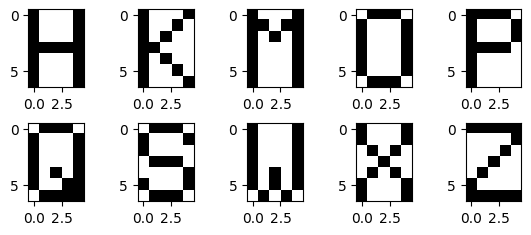

In [8]:
#5
net.show(X)

In [9]:
#6
net.fit(X,y)

In [10]:
#7
net.predict(X)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [11]:
#8
net.errors_

[35.0, 11.0, 3.0, 3.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [12]:
#9
net.misclassified(X,y)

0

In [13]:
#10
def damage(X,percent,seed=1):
  rgen = np.random.RandomState(seed)
  result = np.array( X )
  count = int( X.shape[1]*percent/100 )

  for indeks_example in range( len(X) ):
    order = np.sort( rgen.choice( X.shape[1], count, replace=False) )
    for indeks_pixel in order:
      result[indeks_example][indeks_pixel]*=-1

  return result

damaged5 = damage(X,5)
damaged15 = damage(X,15)
damaged40 = damage(X,40)

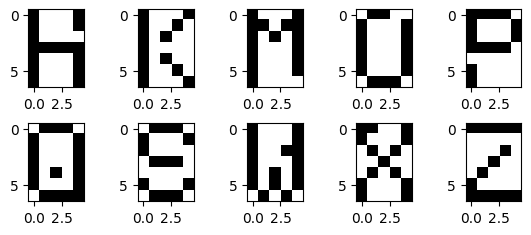

In [14]:
#11a1
net.show( damaged5 )

In [15]:
#11a2
net.predict ( damaged5 )

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [16]:
#11a3
net.misclassified( damaged5 ,y)

2

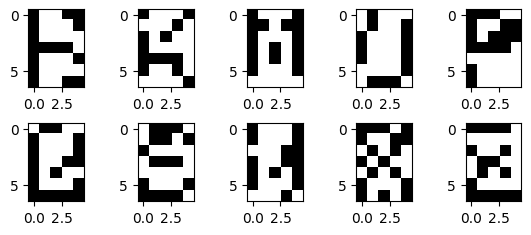

In [17]:
#11b1
net.show( damaged15 )

In [18]:
#11b2
net.predict ( damaged15 )

[array([ 1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1])]

In [19]:
#11b3
net.misclassified( damaged15 ,y)

10

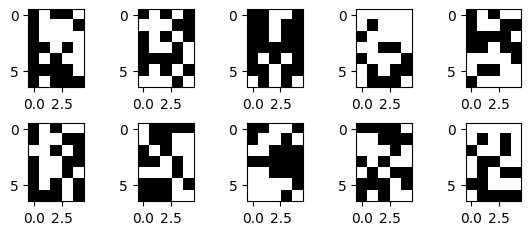

In [20]:
#11c1
net.show( damaged40 )

In [21]:
#11c2
net.predict ( damaged40 )

[array([-1, -1,  1,  1,  1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1, -1,  1,  1,  1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1,  1,  1]),
 array([ 1, -1, -1, -1,  1, -1,  1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1,  1,  1]),
 array([-1,  1,  1,  1, -1, -1,  1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1,  1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1,  1,  1])]

In [22]:
#11c3
net.misclassified( damaged40 ,y)

29